In [4]:
"""Car:
    *noun* = variables
    ideal cruzing speed
    % break chance
    rate accelerate
    current speed
    
    *verb* = functions
    accelerate
    decelerate
    car in front
    
    *collaborator*
    road
    car in front
    """

colour_list = ["red", "blue"]

In [310]:
import random
import numpy as np
import matplotlib.pyplot as plt

class Car():
    
    def __init__(self, max_kph = 120, current_speed = 0, car_length = 5,
                start_location = 0, in_front = None, course_length = 1000):
        self.max_kph = max_kph
        self.current_speed = current_speed
        self.car_length = car_length
        self.location = start_location
        self.in_front = in_front
        self.course_length = course_length
    
    @property
    def move_forward(self):
        self.change_velocity()
        self.location += self.current_speed
        if self.location > self.course_length:
            self.location = self.course_length % 1000
    
    @property
    def translate_max(self):
        return self.max_kph / 3.6
    
    def accelerate(self):
        if self.current_speed < self.translate_max:
            self.current_speed += 2
    
    def can_decelerate(self):
        if random.random() <= .1:
            return True
        return False
    
    def decelerate(self):
        if self.current_speed > 0:
            self.current_speed -= 2
        
    def change_velocity(self):
        if self.distance_check():
            self.keep_distance()
        elif self.can_decelerate():
            self.decelerate()
        else:
            self.accelerate()
            
    def distance_check(self):
        if int(self.location + self.current_speed + 6) >= int(self.in_front.location):
            return True
        else:
            return False
            
    def keep_distance(self):
        self.current_speed = self.in_front.current_speed

In [311]:
class Road():
    
    def __init__(self, road_length = 1000):
        self.road_length = road_length

In [312]:
class Simulation:
    
    def __init__(self, num_cars = 30, length = 1000):
        self.num_cars = num_cars
        self.length = length
        self.cars = self.create_cars(self.num_cars)
    
    def create_cars(self, num_cars = 30):
        cars = []
        locations = np.linspace(0, self.length - 33, num_cars)[::-1]
        old_car = None
        for num in range(num_cars):
            new_car = Car(start_location = locations[num],
                          in_front = old_car)
            cars.append(new_car)
            old_car = new_car
            cars[0].in_front = cars[-1]
        return cars
    
    def simulate(self):
        for car in self.cars:
            car.move_forward
        
            
    def run_simulation(self, times = 60):
        full_report = []
        time_slace = []
        for _ in range(times):
            full_report.append(self.report)
            time_slace = [[x] * len(self.cars) for x in range(times)]
            self.simulate()
        return full_report, time_slace
    
    @property
    def report(self):
        return [car.location for car in self.cars][::-1]
    
    def scatter(self, rounds = 60):
        x, y = self.run_simulation(times = rounds)
        return plt.scatter(x, y, c = ["red", "blue"], marker = "|")

In [301]:
simulation = Simulation()

In [130]:
% matplotlib inline

In [283]:
simulation.simulate()

In [286]:
for car in simulation.cars:
    print("\n Car", car.location)
    print("Car in front", car.in_front.location)
    print("Car speed", car.current_speed)
    print("Car in front speed", car.in_front.current_speed)


 Car 544
Car in front 578
Car speed 34
Car in front speed 34

 Car 496
Car in front 544
Car speed 34
Car in front speed 34

 Car 496
Car in front 496
Car speed 34
Car in front speed 34

 Car 496
Car in front 496
Car speed 34
Car in front speed 34

 Car 496
Car in front 496
Car speed 34
Car in front speed 34

 Car 476
Car in front 496
Car speed 34
Car in front speed 34

 Car 476
Car in front 476
Car speed 34
Car in front speed 34

 Car 332
Car in front 476
Car speed 34
Car in front speed 34

 Car 262
Car in front 332
Car speed 32
Car in front speed 34

 Car 164
Car in front 262
Car speed 30
Car in front speed 32

 Car 164
Car in front 164
Car speed 30
Car in front speed 30

 Car 164
Car in front 164
Car speed 30
Car in front speed 30

 Car 136
Car in front 164
Car speed 34
Car in front speed 30

 Car 68
Car in front 136
Car speed 34
Car in front speed 34

 Car 68
Car in front 68
Car speed 34
Car in front speed 34

 Car 68
Car in front 68
Car speed 34
Car in front speed 34

 Car 914
Car

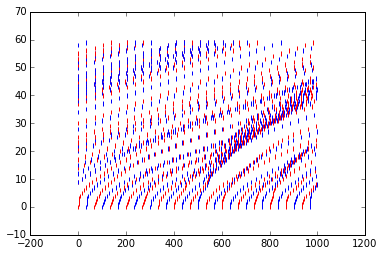

In [314]:
simulation = Simulation()
print(simulation.scatter(60))